In [1]:
%matplotlib inline

import setGPU
import os, h5py
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LogNorm, Normalize
import glob

setGPU: Setting GPU to: 0


/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def loadModel(name, weights=False):
    '''
    Adapted from Kaustuv Datta and Jayesh Mahapatra's CaloImageMacros.
    Loads models from json file.
    :parameter name: name of the json file.
    :type name: str
    :parameter weights: whether or not to load the weights.
    :type weights: bool
    :return: loaded model.
    '''
    from keras.models import model_from_json
    json_file = open('%s' % name, 'r')
    loaded = json_file.read()
    json_file.close()

    model = model_from_json(loaded)

    # load weights into new model
    if weights == True:
        model.load_weights('%s.h5' % name)
    # print(model.summary())

    #print("Loaded model from disk")
    return model

In [3]:
latent_space=100
batch_size=128

noise = np.random.normal(0, 1, (batch_size, latent_space))

In [4]:
def getMetric(all_g_weight, gen_model):
    g = loadModel(gen_model)

    means = []
    stds = []
    epochs = []

    for w in glob.glob(all_g_weight):
        epoch = w.split('/')[-1].split('_')[3]

        g.load_weights(w)
        generated_images = g.predict(noise)
        generated_images = generated_images.squeeze()

        means.append(np.mean(generated_images))
        stds.append(np.std(generated_images))
        epochs.append(int(epoch))
    
    return means, stds, epochs

In [5]:
#all_g_weight1 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/weights/generator_weights_epoch_*.h5'
#gen_model1 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial2_batch_size_32_epochs_4000/weights/generator_modeltrial2.json'

In [5]:
all_g_weight2 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_weights_epoch_*.h5'
gen_model2 = '/nfshome/vitoriabp/Keras-GAN/wgan/trial3_batch_size_128_epochs_2000/weights/generator_modeltrial3_bs_128.json'

In [22]:
all_g_weight2 = '/nfshome/vitoriabp/hgcal_wgan/trial22/weights/generator_weights_epoch_*.h5'
gen_model2 = '/nfshome/vitoriabp/hgcal_wgan/trial22/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_shuffle.json'

In [6]:
all_g_weight1 = '/nfshome/vitoriabp/hgcal_wgan/trial24/weights/generator_weights_epoch_*.h5'
gen_model1 = '/nfshome/vitoriabp/hgcal_wgan/trial24/weights/generator_model_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_tanh_noRescale.json'

In [7]:
means1, stds1, epochs1 = getMetric(all_g_weight1, gen_model1)

Using TensorFlow backend.


In [8]:
means2, stds2, epochs2 = getMetric(all_g_weight2, gen_model2)

In [9]:
def sortMeans(epochs, means):
    epoch_mean = np.array([np.asarray(epochs), np.asarray(means)])
    epoch_mean_sorted = (epoch_mean.T)[np.argsort(epoch_mean[0])]
    return epoch_mean_sorted

In [10]:
epoch_mean_sorted1 = sortMeans(epochs1, means1)

In [11]:
epoch_mean_sorted2 = sortMeans(epochs2, means2)

In [12]:
def plotMean(epoch_mean_sorted):
    plt.scatter(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1])
    plt.title("Mean energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\mu$ (GeV)", size=16)
    plt.xlim(-50, 1000)
    #plt.ylim(0, 0.05)
    #plt.savefig("means.png")
    plt.errorbar(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], yerr=np.std(epoch_mean_sorted[:,1])/np.sqrt(len(epoch_mean_sorted[:,1])), color='grey', alpha = 0.5, fmt='o')

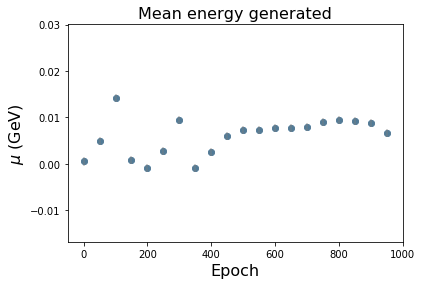

In [13]:
plotMean(epoch_mean_sorted1)

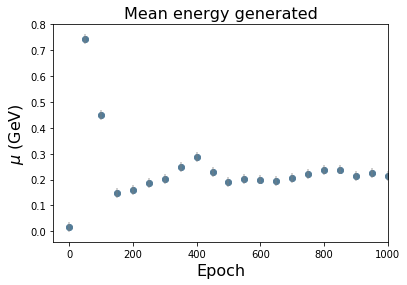

In [14]:
plotMean(epoch_mean_sorted2)

In [15]:
def plotMeans(epoch_mean_sorted1, epoch_mean_sorted2):
    plt.scatter(epoch_mean_sorted1[:,0], epoch_mean_sorted1[:,1], label="first")
    plt.scatter(epoch_mean_sorted2[:,0], epoch_mean_sorted2[:,1], label="second")
    plt.title("Mean energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\mu$ (GeV)", size=16)
    #plt.xlim(-50, 1000)
    #plt.ylim(0, 1.5)
    plt.legend()
    #plt.savefig("means.png")
    #plt.errorbar(epoch_mean_sorted[:,0], epoch_mean_sorted[:,1], yerr=np.std(epoch_mean_sorted[:,1])/np.sqrt(len(epoch_mean_sorted[:,1])), color='grey', alpha = 0.5, fmt='o')

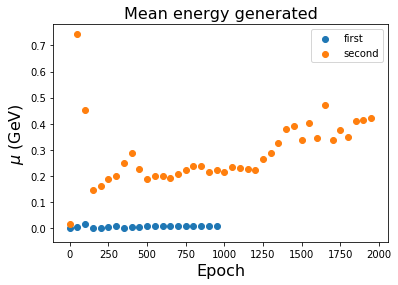

In [16]:
plotMeans(epoch_mean_sorted1, epoch_mean_sorted2)

In [34]:
## No need to execute this again
#f = h5py.File('/bigdata/shared/HGCAL_data/new/all_noPU.h5', 'r')
#X = np.asarray(f['X'])
#X = X.squeeze()

In [35]:
## Should aim for:
#np.mean(X) = 0.02

In [17]:
def plotStd(epochs, stds):
    plt.scatter(epochs, stds)
    plt.title("Standard deviation of energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\sigma$ (GeV)", size=16)
    plt.xlim(-50, 1000)
    #plt.ylim(0, 3.5)
    #plt.savefig("stds.png")

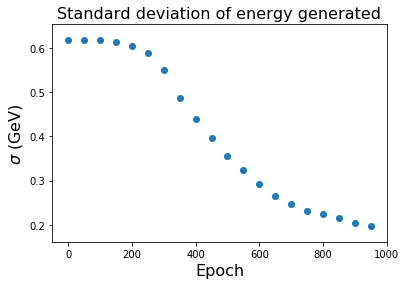

In [18]:
plotStd(epochs1, stds1)

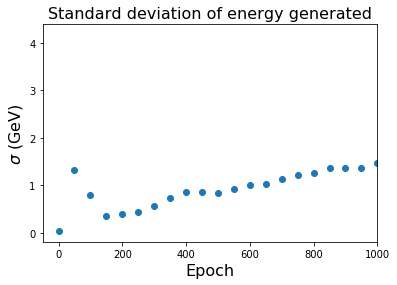

In [19]:
plotStd(epochs2, stds2)

In [20]:
def plotStds(epochs1, stds1, epochs2, stds2):
    plt.scatter(epochs1, stds1, label="first")
    plt.scatter(epochs2, stds2, label="second")
    plt.title("Standard deviation of energy generated", size=16)
    plt.xlabel("Epoch", size=16)
    plt.ylabel("$\sigma$ (GeV)", size=16)
    plt.xlim(-50, 1000)
    #plt.ylim(0, 1)
    plt.legend()
    #plt.savefig("stds.png")

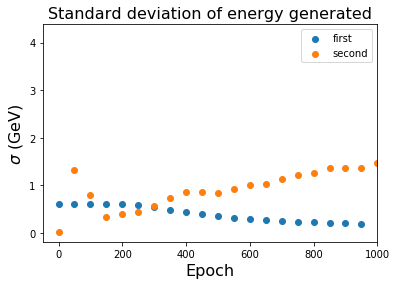

In [21]:
plotStds(epochs1, stds1, epochs2, stds2)

In [42]:
## Aim for:
#np.std(X) = 0.35

# ______________ #

In [29]:
w = "trial21/weights/generator_weights_epoch_950_bs_128_lr_0.00005_latent_100_ncritic_5_clip_0.01_tanh.h5"

In [30]:
g = loadModel(gen_model1)

g.load_weights(w)
generated_images = g.predict(noise)
generated_images = generated_images.squeeze()

In [31]:
generated_images.shape

(128, 16, 16, 55)

In [32]:
generated_images[0:10, 5, 5, 20]

array([-0.44081303,  0.85328174, -0.10013708,  0.61045915,  0.84665143,
        0.5428928 , -0.6914808 ,  0.26045415,  0.1624295 ,  0.6209437 ],
      dtype=float32)

In [6]:
#true_energy = np.asarray(f['y']['b'])

#true_energy.shape

# import os, sys
# if __package__ is None:
#     sys.path.append(os.path.realpath("/data/shared/Software/CMS_Deep_Learning"))

# from CMS_Deep_Learning.postprocessing.metrics import distribute_to_bins

#out, x, y = distribute_to_bins(true_energy, [true_energy, np.sum(X, axis=(1,2,3))], nb_bins=10, equalBins=True)

In [20]:
# def getErrors(stds):
#     errors = []
    
#     for std in stds:
#         error = std/np.sqrt(len(stds))
#         #print(error)
#         errors.append(error)
        
#     return errors

#errors1 = getErrors(stds1)